In [23]:
from music21 import *
import mido as m

In [24]:
f = note.Note("F5")
f.show("midi")

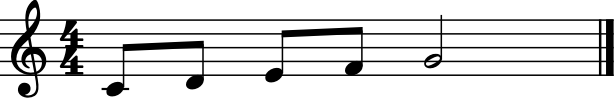

'test.mid'

In [25]:
stream1 = stream.Stream()
stream1.append(note.Note("C4", quarterLength=0.5))
stream1.append(note.Note("D4", quarterLength=0.5))
stream1.append(note.Note("E4", quarterLength=0.5))
stream1.append(note.Note("F4", quarterLength=0.5))
stream1.append(note.Note("G4", quarterLength=2))
stream1.show('midi')
stream1.show()
stream1.write('midi', fp='test.mid')

In [26]:
mid = m.MidiFile('test.mid')
for i, track in enumerate(mid.tracks):
    print('Track {}: {}'.format(i, track.name))
    for msg in track:
        print(msg)


Track 0: 
MetaMessage('set_tempo', tempo=500000, time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('end_of_track', time=1024)
Track 1: 
MetaMessage('track_name', name='', time=0)
pitchwheel channel=0 pitch=0 time=0
note_on channel=0 note=60 velocity=90 time=0
note_off channel=0 note=60 velocity=0 time=512
note_on channel=0 note=62 velocity=90 time=0
note_off channel=0 note=62 velocity=0 time=512
note_on channel=0 note=64 velocity=90 time=0
note_off channel=0 note=64 velocity=0 time=512
note_on channel=0 note=65 velocity=90 time=0
note_off channel=0 note=65 velocity=0 time=512
note_on channel=0 note=67 velocity=90 time=0
note_off channel=0 note=67 velocity=0 time=2048
MetaMessage('end_of_track', time=1024)


In [27]:
m.get_input_names()

['USB MIDI Interface', 'USB MIDI Interface']

In [28]:
inport = m.open_input("USB MIDI Interface")
outport = m.open_output("USB MIDI Interface")

In [44]:
with m.open_output('USB MIDI Interface') as outport:
    mid = m.MidiFile('test.mid')
    for i, track in enumerate(mid.tracks):
        print('Track {}: {}'.format(i, track.name))
        for msg in track:
            # if str(msg)[0:4] == "Meta":
            #     continue
            # if (msg.type == 'note_on') or (msg.type == 'note_off'):
            # outport.send(m.Message(msg.type, note = msg.note, velocity = msg.velocity, time = msg.time))
            # print(msg.type, msg)
            
            if msg.type in ['note_on', 'note_off']:
                outport.send(m.Message(msg.type, note = msg.note, velocity = msg.velocity, time = msg.time))
            # elif msg.type == 'set_tempo':
            #     outport.send(m.Message(msg.type, tempo = msg.tempo, time = msg.time))
            # elif msg.type == 'time_signature':
            #     outport.send(m.Message(msg.type, numerator = msg.numerator, denominator = msg.denominator, time = msg.time))
            # elif msg.type == 'key_signature':
            #     outport.send(m.Message(msg.type, key = msg.key, time = msg.time))
            # elif msg.type == 'end_of_track':
            #     outport.send(m.Message(msg.type, time = msg.time))
            # elif msg.type == 'track_name':
            #     outport.send(m.Message(msg.type, name = msg.name, time = msg.time))
            # elif msg.type == 'pitch_wheel':
            #     outport.send(m.Message(msg.type, pitch = msg.pitch, time = msg.time))
                
            
            print(msg)

Track 0: 
MetaMessage('set_tempo', tempo=500000, time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('end_of_track', time=1024)
Track 1: 
MetaMessage('track_name', name='', time=0)
pitchwheel channel=0 pitch=0 time=0
note_on channel=0 note=60 velocity=90 time=0
note_off channel=0 note=60 velocity=0 time=512
note_on channel=0 note=62 velocity=90 time=0
note_off channel=0 note=62 velocity=0 time=512
note_on channel=0 note=64 velocity=90 time=0
note_off channel=0 note=64 velocity=0 time=512
note_on channel=0 note=65 velocity=90 time=0
note_off channel=0 note=65 velocity=0 time=512
note_on channel=0 note=67 velocity=90 time=0
note_off channel=0 note=67 velocity=0 time=2048
MetaMessage('end_of_track', time=1024)


In [ ]:
# Tim's box
with m.open_output('USB MIDI Interface') as outport:
    mid = m.MidiFile('test.mid')
    for msg in MidiFile('test.mid').play():
        outport.send(msg)